In [41]:
# Data Retrieval and Pre-processing

# Install and import libraries
import pandas as pd
import yfinance as yf  # For downloading historical stock data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Retrieve Historical Data
ticker = 'NVDA' # Choose any ticker symbol
start_date = '2020-1-1' 
end_date = '2026-1-1'
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [42]:
# explore dataset
type(data)
data.head()
data.shape

(1508, 5)

In [43]:
# data cleaning
data.dropna(inplace=True)  # Remove missing values
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# See if dataset has changed
data.shape

(1508, 5)

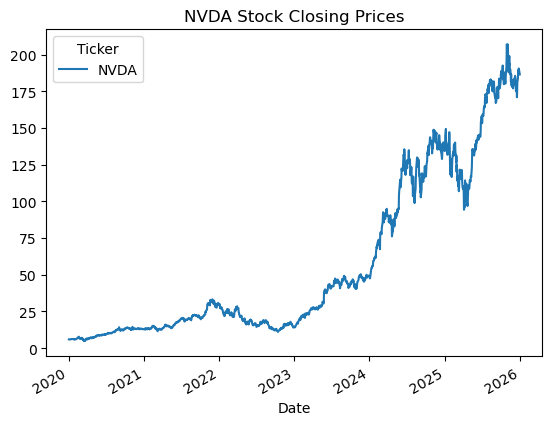

In [44]:
# Exploratory Data Analysis (EDA)

# Visualize stock prices
data['Close'].plot(title='NVDA Stock Closing Prices')
plt.show()

In [45]:
# Statistical Summary
print(data.describe())

Price         Close         High          Low         Open        Volume
Ticker         NVDA         NVDA         NVDA         NVDA          NVDA
count   1508.000000  1508.000000  1508.000000  1508.000000  1.508000e+03
mean      57.574666    58.552879    56.489919    57.581614  4.093023e+08
std       56.653391    57.512143    55.721166    56.714986  1.947356e+08
min        4.891089     5.228283     4.499601     4.983231  6.552850e+07
25%       14.561633    14.836493    14.213654    14.563623  2.526533e+08
50%       26.493099    26.980577    26.092676    26.505799  3.846425e+08
75%      107.978777   110.472446   104.235390   107.038183  5.227785e+08
max      207.028473   212.178195   205.548551   208.068415  1.543911e+09


In [46]:
# Moving Averages and Basic Technical Indicators

# Calculate Simple Moving Averages (SMAs) for 10 & 50 day periods
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA10'].tail()

Date
2025-12-24    179.754001
2025-12-26    180.714001
2025-12-29    182.034001
2025-12-30    183.159001
2025-12-31    184.037001
Name: MA10, dtype: float64

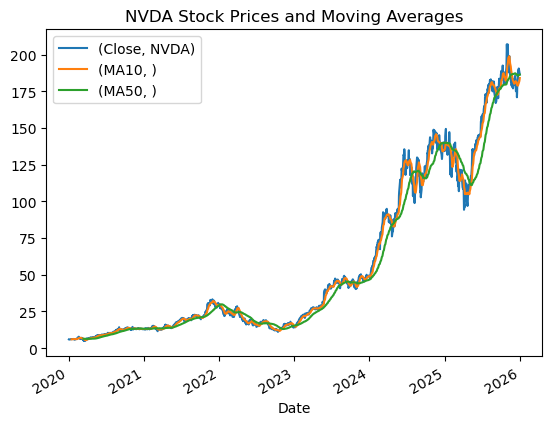

In [47]:
# Plot SMAs
data[['Close', 'MA10', 'MA50']].plot(title='NVDA Stock Prices and Moving Averages')
plt.legend()
plt.show()


In [48]:
# Implementing a Moving Average Crossover Strategy

# Define Trading Signals based on crossover of SMAs
data['Signal'] = np.where(data['MA10'] > data['MA50'], 1, 0)
data['Position'] = data['Signal'].diff()
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2020-01-02 to 2025-12-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1508 non-null   float64
 1   (High, NVDA)    1508 non-null   float64
 2   (Low, NVDA)     1508 non-null   float64
 3   (Open, NVDA)    1508 non-null   float64
 4   (Volume, NVDA)  1508 non-null   int64  
 5   (MA10, )        1499 non-null   float64
 6   (MA50, )        1459 non-null   float64
 7   (Signal, )      1508 non-null   int64  
 8   (Position, )    1507 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 117.8 KB


/var/folders/7d/_3dtfr250xq5x8_mtxc26h3r0000gn/T/ipykernel_25395/1640216487.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

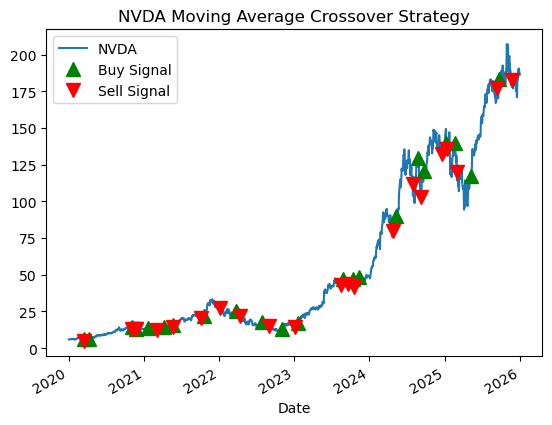

In [50]:
# Visualize Moving Average Crossover Strategy
plt.figure(figsize=(10,5))
data['Close'].plot(title='NVDA Moving Average Crossover Strategy')
plt.plot(data[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['Close'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.legend()
plt.show()


In [51]:
# Backtesting Strategy

# Initialize the portfolio DataFrame with the positions
portfolio = pd.DataFrame(index=data.index)
portfolio['Position'] = data['Position']
if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']
portfolio['Adj Close'] = data['Adj Close']
portfolio['Position'] = data['Position']
portfolio['Holdings'] = (data['Position'].cumsum() * data['Adj Close']).fillna(0)
initial_cash = 100000
portfolio['Cash'] = initial_cash - (data['Position'] * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change().fillna(0)
portfolio.tail(50)

,Position,Adj Close,Holdings,Cash,Total,Returns
Date,,,,,,
2025-10-21,0.0,181.149918,181.149918,99914.75502,100095.904937,-1.478480e-05
2025-10-22,0.0,180.269958,180.269958,99914.75502,100095.024978,-8.791160e-06
2025-10-23,0.0,182.149857,182.149857,99914.75502,100096.904876,1.878113e-05
2025-10-24,0.0,186.249619,186.249619,99914.75502,100101.004638,4.095793e-05
2025-10-27,0.0,191.479340,191.479340,99914.75502,100106.234359,5.224444e-05
2025-10-28,0.0,201.018814,201.018814,99914.75502,100115.773834,9.529351e-05
2025-10-29,0.0,207.028473,207.028473,99914.75502,100121.783493,6.002709e-05
2025-10-30,0.0,202.878708,202.878708,99914.75502,100117.633728,-4.144717e-05
2025-10-31,0.0,202.478729,202.478729,99914.75502,100117.233749,-3.995087e-06


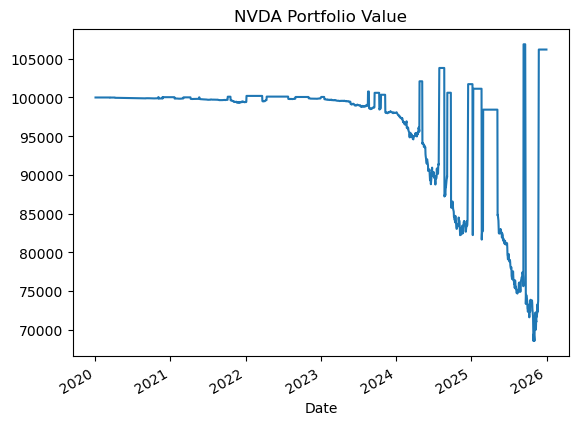

In [52]:
# Calculate Portfolio Value
initial_capital = 100000  # Starting capital
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

portfolio['Total'].plot(title='NVDA Portfolio Value')
plt.show()

In [53]:
# Compare ML models to predict future price movements/stock returns

# Feature Engineering
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data.head()


Price,Close,High,Low,Open,Volume,MA10,MA50,Signal,Position,Adj Close,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,,
Date,,,,,,,,,,,
2020-01-02,5.971077,5.971077,5.891683,5.942207,237536000,NaN,NaN,0,NaN,5.971077,NaN
2020-01-03,5.875504,5.919309,5.826473,5.851362,205384000,NaN,NaN,0,0.0,5.875504,-0.016006
2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000,NaN,NaN,0,0.0,5.900144,0.004194
2020-01-07,5.971576,6.017371,5.883469,5.928518,314856000,NaN,NaN,0,0.0,5.971576,0.012107
2020-01-08,5.982775,6.024091,5.927273,5.967344,277108000,NaN,NaN,0,0.0,5.982775,0.001875


In [54]:
# Train and Compare Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
data = yf.download('NVDA', start='2020-01-01', end='2025-01-01')

# Compute returns and moving averages
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
# Follow suit for MA50
data['MA50'] = data['Close'].rolling(window=50).mean()

# Drop the NaN values after the shifting operation to align the indices
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)  # Make sure to drop NaN values to align 'X' and 'y'

# Prepare the features (X) and target (y)
X = data[['Returns', 'MA10', 'MA50']]
y = data['Target']



[*********************100%***********************]  1 of 1 completed


In [55]:
data.head()

Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,Target
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,
2020-03-13,5.997809,6.002292,5.469103,5.740304,634836000,0.113402,6.415943,6.404862,0
2020-03-16,4.891089,5.630730,4.831321,5.289798,726972000,-0.184521,6.216638,6.383262,1
2020-03-17,5.410829,5.500233,4.756608,5.003404,833632000,0.106262,6.095557,6.373969,0
2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000,-0.066507,5.892118,6.356985,1
2020-03-19,5.303743,5.397381,4.816129,5.029553,765512000,0.050045,5.741899,6.343628,0


In [56]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression()
svm = SVC()

models = [rf, log_reg, svm]

for model in models:
    model.fit(X_train, y_train)

predictions = [model.predict(X_test) for model in models]
for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, predictions[i])
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")

RandomForestClassifier Accuracy: 0.5289256198347108
LogisticRegression Accuracy: 0.5413223140495868
SVC Accuracy: 0.5371900826446281


In [57]:
# Model Evaluation

from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
for model in models:
 predictions = model.predict(X_test)

 # Confusion Matrix and Classification Report
 conf_matrix = confusion_matrix(y_test, predictions)
 print(conf_matrix)
 report = classification_report(y_test, predictions)
 print(report)


[[46 65]
 [49 82]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.45       111
           1       0.56      0.63      0.59       131

    accuracy                           0.53       242
   macro avg       0.52      0.52      0.52       242
weighted avg       0.52      0.53      0.52       242

[[  6 105]
 [  6 125]]
              precision    recall  f1-score   support

           0       0.50      0.05      0.10       111
           1       0.54      0.95      0.69       131

    accuracy                           0.54       242
   macro avg       0.52      0.50      0.40       242
weighted avg       0.52      0.54      0.42       242

[[  5 106]
 [  6 125]]
              precision    recall  f1-score   support

           0       0.45      0.05      0.08       111
           1       0.54      0.95      0.69       131

    accuracy                           0.54       242
   macro avg       0.50      0.50      0.39       242
weighted 

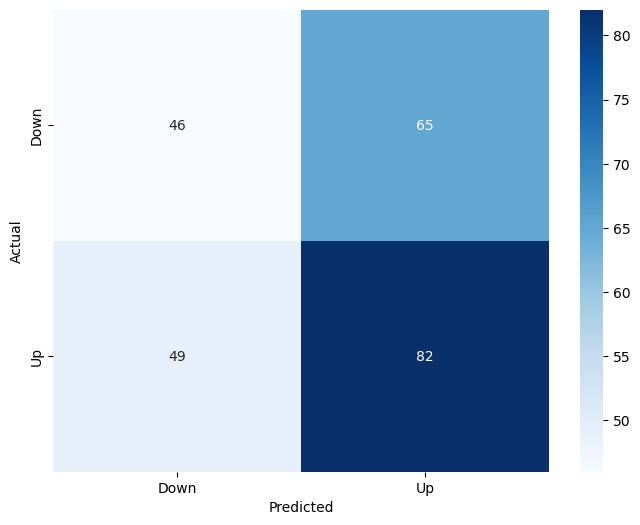

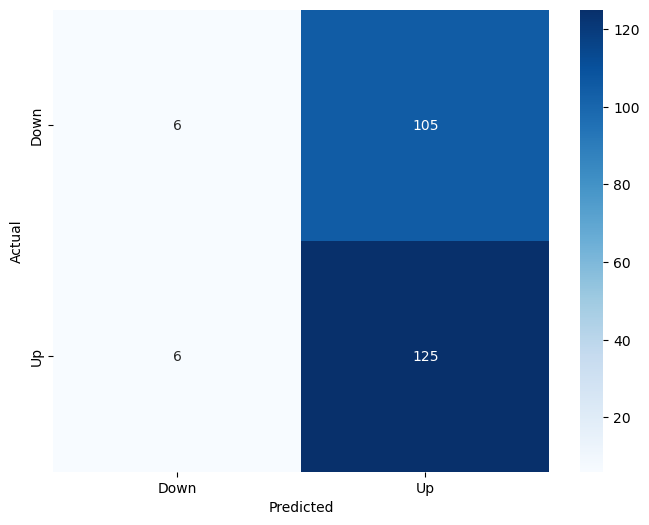

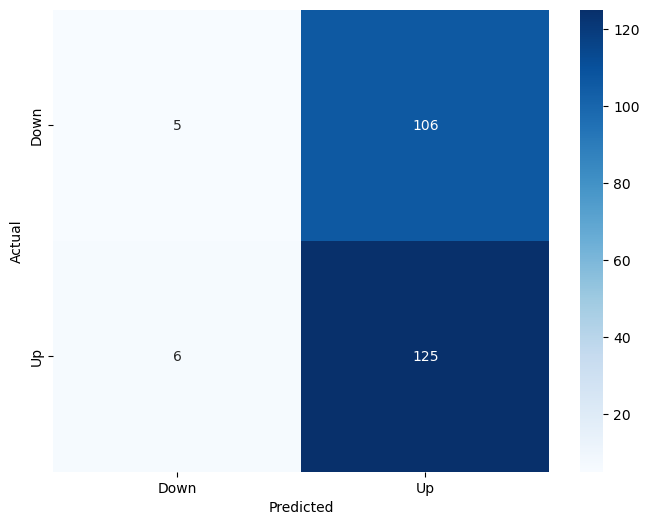

In [58]:
# Visualizations for model performance

for model in models:
 predictions = model.predict(X_test)
 conf_matrix = confusion_matrix(y_test, predictions)
 plt.figure(figsize=(8, 6))
 sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
 plt.xlabel('Predicted')
 plt.ylabel('Actual')

**Capital Asset Pricing Model (CAPM) Parameter Estimation**

**Goal**: Estimate each stock's CAPM alpha and beta coefficients by regressing their excess returns against the market's (S&P 500) returns

The Capital Asset Pricing Model is given by the following equation :

$$
R_i - R_f \;=\; \alpha_i \;+\; \beta_i\,(R_m - R_f)\;+\;\varepsilon_i
$$

- **$R_i$**: Actual return of asset *i* (e.g. daily % change).  
- **$R_f$**: Risk-free rate for the same period (e.g. daily T-bill yield).  
- **$(R_i − R_f)$**: Excess return of asset *i* above the risk-free rate.  
- **$R_m$**: Actual return of the market portfolio (e.g. S&P 500).  
- **$(R_m − R_f)$**: Market’s excess return (the risk premium).  
- **$β_i$**: Sensitivity of asset *i* excess return to a 1 % move in the market’s excess return.  
- **$α_i$**: Average “abnormal” return of asset *i* not explained by market moves. The intercept term of the model.
- **$ε_i$**: Residual error term (all other noise/factors).

In [59]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

In [60]:
# Grab 1 year of daily closing prices for stocks + the market index (S&P 500).
tickers = ['TSLA', 'MSFT', 'GS', '^GSPC']
data = yf.download(tickers, period='1y', interval='1d')['Close']

# Rename the market column
data = data.rename(columns={'^GSPC': 'SP500'})

[*********************100%***********************]  4 of 4 completed


In [61]:
# Calculate returns based on closing prices
returns = data.pct_change().dropna()

# Quick check
returns.head()

Ticker,GS,MSFT,TSLA,SP500
Date,,,,
2025-01-21,0.014059,-0.001235,-0.005698,0.008768
2025-01-22,-0.003167,0.041307,-0.021129,0.006138
2025-01-23,0.010700,0.001143,-0.006577,0.005313
2025-01-24,-0.004066,-0.005932,-0.014065,-0.002855
2025-01-27,-0.005684,-0.021394,-0.023193,-0.014581


In [62]:
rf_annual = 0.04 # Assume the annual risk free rate to be 4% and then convert it to daily rate

rf_daily  = (1 + rf_annual)**(1/252) - 1 

# Add a column of the calculated daily returns to data
returns['RF'] = rf_daily

In [63]:
# Create a dataframe consisting of the excess returns each stock compared to the market index which is S&P 500
excess = pd.DataFrame({
    'SP500_exc': returns['SP500'] - returns['RF'],
})
for stock in ['TSLA','MSFT','GS']:
    excess[f'{stock}_exc'] = returns[stock] - returns['RF']

# Take a look at the excess table
excess.head()

,SP500_exc,TSLA_exc,MSFT_exc,GS_exc
Date,,,,
2025-01-21,0.008613,-0.005853,-0.001391,0.013903
2025-01-22,0.005982,-0.021284,0.041151,-0.003322
2025-01-23,0.005158,-0.006732,0.000987,0.010544
2025-01-24,-0.003011,-0.014220,-0.006088,-0.004221
2025-01-27,-0.014736,-0.023349,-0.021549,-0.005840


In [64]:
def run_capm(y_exc, x_exc):
    """
    Performs Ordinary Least Square (OLS) regression of y_exc ~ x_exc
    Returns the fitted model so we can inspect alpha & beta.
    """
    X = sm.add_constant(x_exc)      # adds alpha, the intercept
    model = sm.OLS(y_exc, X).fit()  # This will run a regression model on the provided data and return a model with each stock's alpha and beta.
    return model

In [65]:
# Create a dictionary to store the results for every stock
results = {}

#This will run regression model on each stock and return their respective results
for stock in ['TSLA','MSFT','GS']:
    y_exc = excess[f'{stock}_exc']
    x_exc = excess['SP500_exc']
    model = run_capm(y_exc, x_exc)
    results[stock] = {
        'alpha': model.params['const'],
        'beta' : model.params['SP500_exc'],
        'R2'   : model.rsquared,
    }

# Display results
pd.DataFrame(results).T.rename_axis('Ticker').round(4)

,alpha,beta,R2
Ticker,,,
TSLA,-0.0004,2.3013,0.4712
MSFT,-0.0002,0.9052,0.4752
GS,0.0012,1.3764,0.6675


In [66]:
# Build and plot Efficient Frontier for chosen set of stocks

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
tickers = ["NVDA", "GOOGL", "GS", "LLY", "WMT", "^GSPC"]
start_date = "2023-06-05"
end_date   = "2025-06-05"
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)

[*********************100%***********************]  6 of 6 completed


In [67]:
prices = raw_data['Close'].copy()

In [68]:
print(prices.head())

Ticker           GOOGL          GS         LLY       NVDA        WMT  \
Date                                                                   
2023-06-05  125.065048  302.881470  436.368042  39.138466  48.520756   
2023-06-06  126.355293  307.577942  435.199188  38.621906  48.514275   
2023-06-07  121.581367  316.001617  428.618195  37.447754  48.585529   
2023-06-08  121.224075  315.738037  437.743225  38.482006  49.288399   
2023-06-09  121.313393  316.255707  438.116425  38.741817  49.586391   

Ticker            ^GSPC  
Date                     
2023-06-05  4273.790039  
2023-06-06  4283.850098  
2023-06-07  4267.520020  
2023-06-08  4293.930176  
2023-06-09  4298.859863  


In [69]:
# Calculate daily returns and drop any missing values
returns = prices.pct_change().dropna()

#Compute mean of the daily returns
mean_daily_returns = returns.mean()
mean_daily_returns

Ticker
GOOGL    0.000761
GS       0.001503
LLY      0.001351
NVDA     0.003108
WMT      0.001508
^GSPC    0.000719
dtype: float64

In [70]:
#Compute the covariance
cov_matrix_daily = returns.cov()
print(cov_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   0.000354  0.000114  0.000055  0.000275  0.000045  0.000116
GS      0.000114  0.000325  0.000069  0.000217  0.000070  0.000132
LLY     0.000055  0.000069  0.000475  0.000169  0.000069  0.000077
NVDA    0.000275  0.000217  0.000169  0.001074  0.000057  0.000226
WMT     0.000045  0.000070  0.000069  0.000057  0.000171  0.000057
^GSPC   0.000116  0.000132  0.000077  0.000226  0.000057  0.000103


In [71]:
#Compute the correlation
corr_matrix_daily = returns.corr()
print(corr_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   1.000000  0.335750  0.133082  0.445190  0.181690  0.608100
GS      0.335750  1.000000  0.174890  0.367533  0.298187  0.720083
LLY     0.133082  0.174890  1.000000  0.236889  0.241783  0.348646
NVDA    0.445190  0.367533  0.236889  1.000000  0.133598  0.680407
WMT     0.181690  0.298187  0.241783  0.133598  1.000000  0.428935
^GSPC   0.608100  0.720083  0.348646  0.680407  0.428935  1.000000


In [72]:
# Annualize all the daily statistics by multiplying with 252 (number of trading days in a year)
trading_days = 252
mean_annual_returns = mean_daily_returns * trading_days
cov_matrix_annual = cov_matrix_daily * trading_days
volatility_annual = returns.std() * np.sqrt(trading_days)

In [73]:
# Run CAPM Regression for each stock to estimate alpha and beta
import statsmodels.api as sm

market_ret = returns["^GSPC"]       # daily market (S&P 500) returns
stock_rets = returns.drop(columns="^GSPC")  # the chosen individual stocks

# For each stock, regress its returns on the market returns
alphas = {}
betas  = {}
for ticker in stock_rets.columns:
    y = stock_rets[ticker]               # dependent variable
    X = sm.add_constant(market_ret)      # add intercept term
    model = sm.OLS(y, X).fit()           # ordinary least squares
    alphas[ticker] = model.params["const"]
    betas[ticker]  = model.params["^GSPC"]

# Store the alphas and betas in Pandas table
import pandas as pd

regression_table = pd.DataFrame({
    "Alpha (daily)" : alphas,
    "Beta"          : betas
})

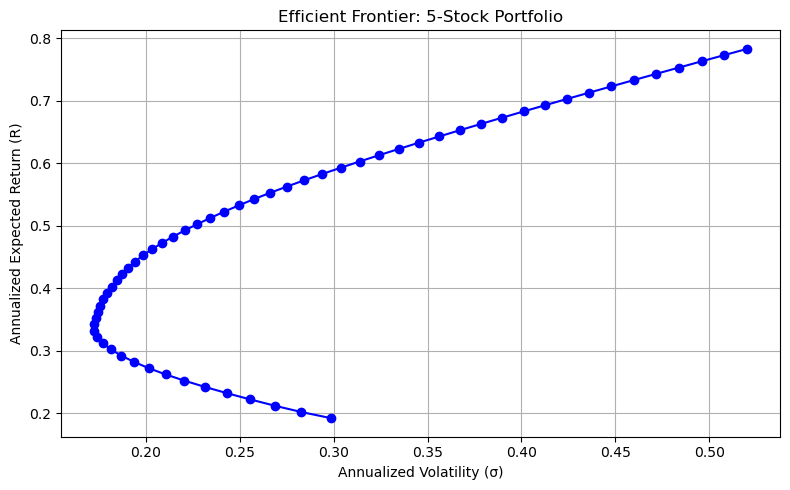

In [74]:
# Build and plot efficient frontier for portfolio
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Helper function to find the portfolio allocation that yields the lowest possible risk
def efficient_frontier(mu, Sigma, n_points=100):
    """
    mu : array of expected returns of the stocks
    Sigma : covariance matrix of the stocks
    Compute a long-only efficient frontier:
      - minimize portfolio volatility σ = sqrt(wᵀ Σ w)
      - subject to: sum(w) = 1, wᵀ mu = R_target, and 0 ≤ w_i ≤ 1
    Returns:
      vols      : array of volatilities (σ) along the frontier
      rets      : matching target returns (R_target)
      weights   : list of optimal weight vectors for each point
    """
    n = len(mu)
    vols, rets, weights = [], [], []

    # spread target returns evenly between worst and best single-stock μ
    R_targets = np.linspace(mu.min(), mu.max(), n_points)

    for R in R_targets:

        # objective: portfolio volatility
        objective = lambda w: np.sqrt(w @ Sigma @ w)

        # constraints:
        #  - fully invested: sum(w) = 1
        #  - achieve target return: wᵀ mu = R
        cons = (
            {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
            {"type": "eq", "fun": lambda w: w @ mu - R}
        )

        # long-only bounds: 0 ≤ w_i ≤ 1
        bounds = [(0.0, 1.0)] * n

        # start from equal weights
        w0 = np.repeat(1/n, n)

        result = minimize(objective, w0, bounds=bounds, constraints=cons)
        if result.success:
            vols.append(result.fun)      # minimized σ
            rets.append(R)               # target return
            weights.append(result.x)     # optimal weights

    return np.array(vols), np.array(rets), weights


# Annualize daily statistics
trading_days = 252
mu_annual    = returns.mean() * trading_days
Sigma_annual = returns.cov() * trading_days

# Select the five stocks and extract sub-vector & sub-matrix
tickers   = ["NVDA", "GOOGL", "GS", "LLY", "WMT"]
mu_vec    = mu_annual.loc[tickers].values               # shape (5,)
Sigma_sub = Sigma_annual.loc[tickers, tickers].values   # shape (5,5)


# Compute the frontier
vols5, rets5, weights5 = efficient_frontier(mu_vec, Sigma_sub, n_points=60)


# Plot the efficient frontier
plt.figure(figsize=(8, 5))
plt.plot(vols5, rets5, marker='o', linestyle='-', color='blue')
plt.title("Efficient Frontier: 5-Stock Portfolio")
plt.xlabel("Annualized Volatility (σ)")
plt.ylabel("Annualized Expected Return (R)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Find the index of the smallest volatility in vols5
idx_min = np.argmin(vols5)

# Get the corresponding weight vector from weights of assets
min_risk_weights = weights5[idx_min]

print("Lowest risk (σ):", vols5[idx_min])
print("Expected return at lowest risk (R):", rets5[idx_min])

for i, ticker in enumerate(tickers):
    weight = min_risk_weights[i]
    print(f"{ticker}: {weight:.3%}")


Lowest risk (σ): 0.17232306193568026
Expected return at lowest risk (R): 0.34222770550356696
NVDA: 0.074%
GOOGL: 17.457%
GS: 16.322%
LLY: 12.639%
WMT: 53.508%


In [76]:
# Mean Reversion Strategy (Long only)

import datetime
import yfinance as yf
import pandas as pd


initial_capital = 10_000.00   #can change starting value
ticker          = "NVDA"      
end_date        = "2025-05-29"
start_date      = "2024-05-29"

# Download daily Close prices for the past year
data   = yf.download(ticker, start=start_date, end=end_date, progress=False)
prices = data["Close"].dropna()
prices

Ticker,NVDA
Date,
2024-05-29,114.766441
2024-05-30,110.443642
2024-05-31,109.577095
2024-06-03,114.941353
2024-06-04,116.377632
...,...
2025-05-21,131.776077
2025-05-22,132.805893
2025-05-23,131.266174


In [77]:
# Compute the RSI signals and make a decision whether to go long or to stay flat.

# For simplification, we assume that we are purchasing fractional shares. That is if we have to go long, we invest all the capital that we have.

import numpy as np
import pandas as pd

if isinstance(prices, pd.DataFrame):
    prices = prices["NVDA"]

# Calculate daily price changes
delta = prices.diff()

''' 2. Separate gains and losses. This will create two different columns gain and loss, where column gain will only contain positive price changes
and the negative price changes will be 0. The same would apply loss column.'''
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Calculate average gain/loss over a period of 14 days. Feel free to tweak the value of N to observe different amount of profits.
N = 14
avg_gain = gain.rolling(window=N).mean().fillna(0)
avg_loss = loss.rolling(window=N).mean().fillna(0)

# Compute RS and RSI
rs  = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

''' 5. Now, based on the rsi values of each row, we decide whether to buy or sell a stock.
 1 -> Buy
 -1 -> Sell
 0 -> Do nothing
 As a starting point, we use the conventional rule that says if the RSI < 30 we buy and if RSI > 70 we sell a stock. '''
signal = pd.Series(0, index=prices.index, dtype=int)
signal.loc[rsi < 30] =  1
signal.loc[rsi > 70] = -1

# Convert actions into daily positions:
positions = signal.replace(-1, 0)

# If any row is NaN, carry forward the last position
positions = positions.ffill()

# avoid look-ahead bias: shift signals so trades execute at the next day’s price
positions = positions.shift(1).fillna(0)


In [78]:
#  Backtest our trading strategy.

# Compute daily simple returns
returns = prices.pct_change().fillna(0)

# Strategy returns: If we are taking a long position it returns some value, else it returns 0 because we are not taking any position
strat_rets   = positions * returns

# Update your capital each day by applying that day’s return
equity_curve = initial_capital * (1 + strat_rets).cumprod()

In [79]:
# Performance Summary

final_amount = equity_curve.iloc[-1]
net_profit   = final_amount - initial_capital

print(f"Initial Capital : ${initial_capital:,.2f}")
print(f"Final Amount    : ${final_amount:,.2f}")
print(f"Net Profit      : ${net_profit:,.2f}")




Initial Capital : $10,000.00
Final Amount    : $13,466.44
Net Profit      : $3,466.44
